# Avik Das (MDS202112)

In [ ]:
# importing libraries
import cv2, glob
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 5)

## 1) Write a program to implement histogram equalization on an image. Write and implement a code that

### a) displays the histogram of the input image

In [ ]:
def hist_of_img(img, title, show_im = True, show_hist = True):
  if show_im == True and show_hist == True:
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img, cmap = 'gray')
    ax[0].set_xticks([])
    ax[0].set_yticks([])
    ax[1].hist(img.flatten(), 256, [0,256], color = 'g')
    fig.suptitle(title, fontsize = 15)
    plt.figure(figsize=(10,5))
    plt.show()
  elif show_im == True and show_hist == False:
    plt.imshow(img, cmap = 'gray')
    plt.title(title, fontsize = 15)
    plt.figure(figsize=(5,5))
    plt.show()
  elif show_im == False and show_hist == True:
    plt.hist(img.flatten(), 256, [0,256], color = 'g')
    plt.title(title, fontsize = 15)
    plt.figure(figsize=(5,5))
    plt.show()

### b) implements histogram equalization as discussed in class

In [ ]:
def hist_equalization(img):
  hist, bins = np.histogram(img.flatten(), 256, [0,256])
  cdf = hist.cumsum()
  # to find the minimum histogram value excluding 0
  # and applying the formula for histogram equalization
  cdf_m = np.ma.masked_equal(cdf,0)
  cdf_m = 255*((cdf_m - cdf_m.min())/(cdf_m.max() - cdf_m.min()))
  cdf = np.ma.filled(cdf_m,0).astype('uint8')
  return cdf

### c) displays the equalized histogram

In [ ]:
def show_eq_hist(img,title):
  cdf = hist_equalization(img)
  hist_of_img(cdf[img], title, show_im = False, show_hist = True)

### d) plots the transform function corresponding to the pair of input and output histograms

In [ ]:
def intensity_hist(cdf):
  plt.plot(list(range(0,256)),cdf[list(range(0,256))])
  plt.xlabel("Input intensities", fontsize=12)
  plt.ylabel("Output intensities", fontsize=12)
  plt.title("\n\nIntensity transformation due to equalization", fontsize=18)
  plt.figure(figsize=(10,10))
  plt.show()

### e) displays the image corresponding to the equalized histogram

In [ ]:
def show_eq_hist_img(img,title):
  cdf = hist_equalization(img)
  hist_of_img(cdf[img], title, show_im = True, show_hist = False)

## 2) Use the above code to apply histogram equalization on the images uploaded in the Google folder labeled ‘Histogram assignment’.


In [ ]:
# fetching images
!rm *.jpg *.png
!gdown --id 1KdX4VLYq5aAmIBaZg_lfZ1gKQR15USFR
!unzip Histogram_assignment.zip

rm: cannot remove '*.jpg': No such file or directory
rm: cannot remove '*.png': No such file or directory
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1KdX4VLYq5aAmIBaZg_lfZ1gKQR15USFR
To: /content/Histogram_assignment.zip
100% 390k/390k [00:00<00:00, 110MB/s]
Archive:  Histogram_assignment.zip
  inflating: Histogram assignment/HawkesBay.jpg  
  inflating: Histogram assignment/crayons.jpg  
  inflating: Histogram assignment/image1.jpg  
  inflating: Histogram assignment/image2.jpg  
  inflating: Histogram assignment/chestxray1.png  


In [ ]:
HawkesBay = cv2.imread('/content/Histogram assignment/HawkesBay.jpg',0)
chestxray1 = cv2.imread('/content/Histogram assignment/chestxray1.png',0)
crayons = cv2.imread('/content/Histogram assignment/crayons.jpg',1)
image1 = cv2.imread('/content/Histogram assignment/image1.jpg',1)
image2 = cv2.imread('/content/Histogram assignment/image2.jpg',1)

crayons = cv2.cvtColor(crayons, cv2.COLOR_BGR2RGB)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

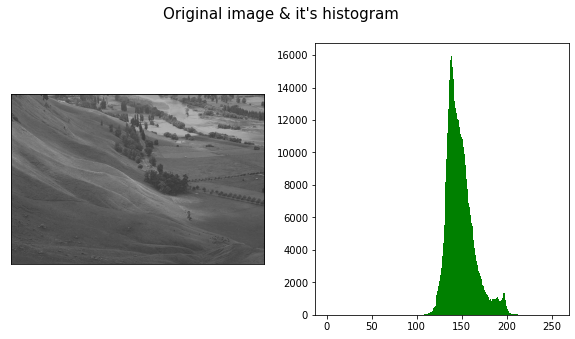

<Figure size 720x360 with 0 Axes>

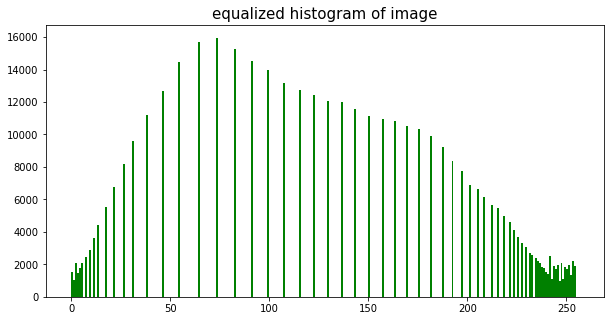

<Figure size 360x360 with 0 Axes>

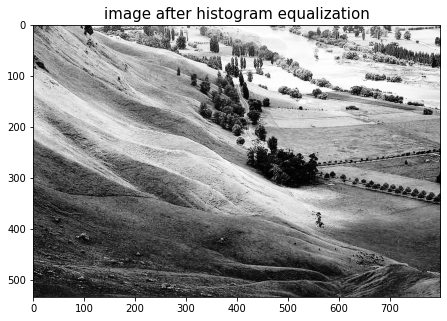

<Figure size 360x360 with 0 Axes>

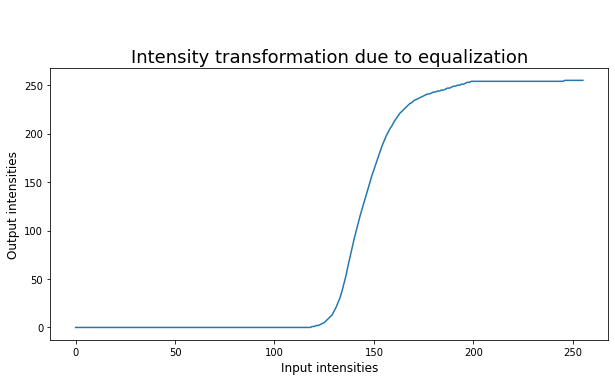

<Figure size 720x720 with 0 Axes>

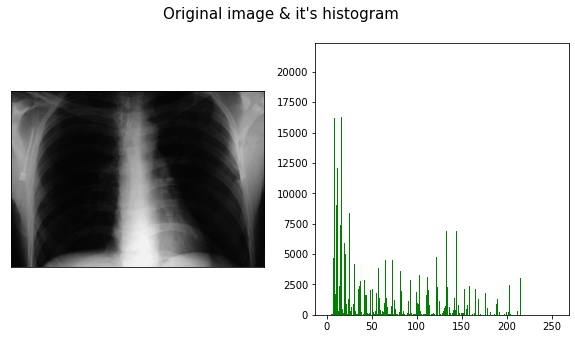

<Figure size 720x360 with 0 Axes>

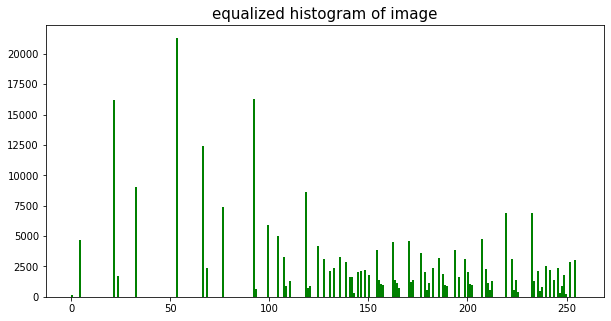

<Figure size 360x360 with 0 Axes>

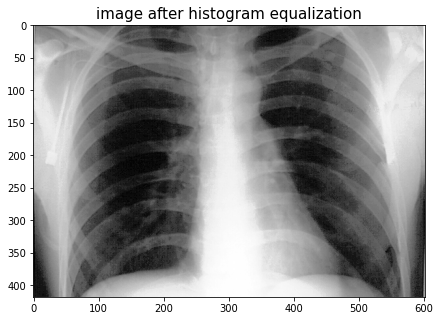

<Figure size 360x360 with 0 Axes>

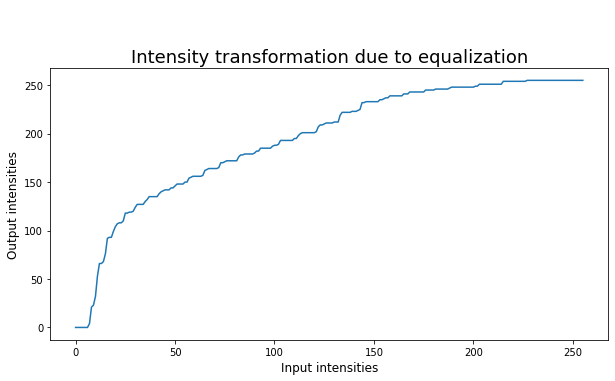

<Figure size 720x720 with 0 Axes>

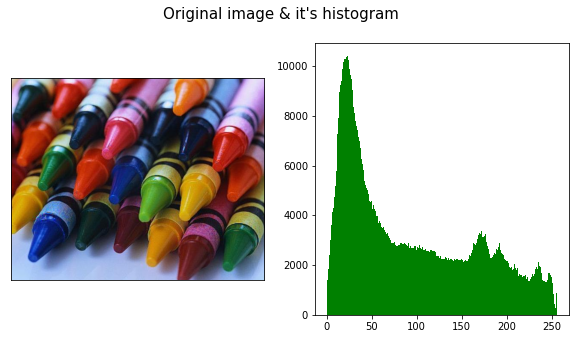

<Figure size 720x360 with 0 Axes>

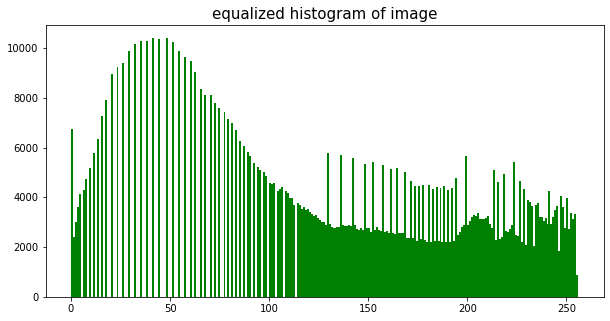

<Figure size 360x360 with 0 Axes>

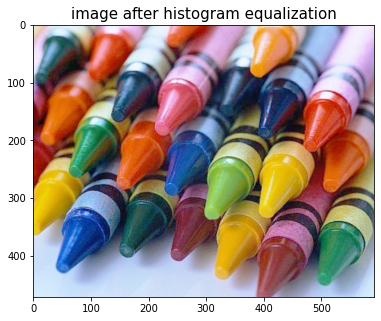

<Figure size 360x360 with 0 Axes>

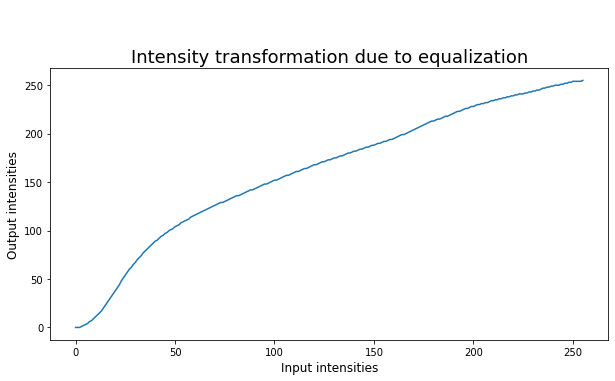

<Figure size 720x720 with 0 Axes>

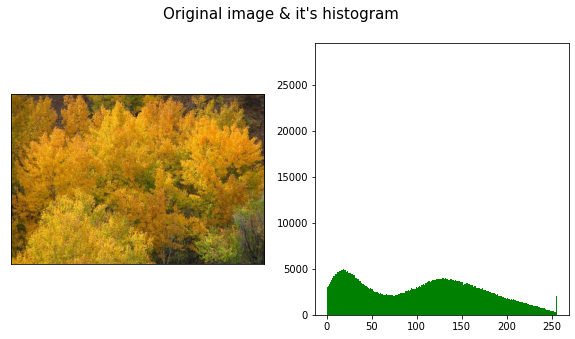

<Figure size 720x360 with 0 Axes>

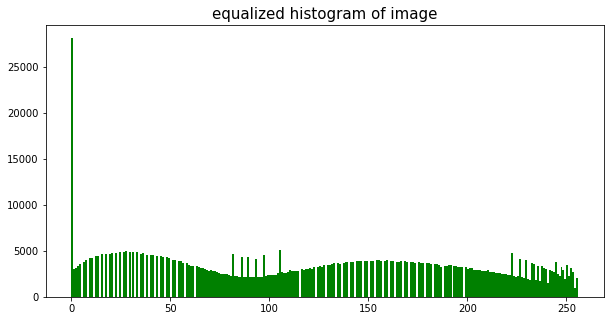

<Figure size 360x360 with 0 Axes>

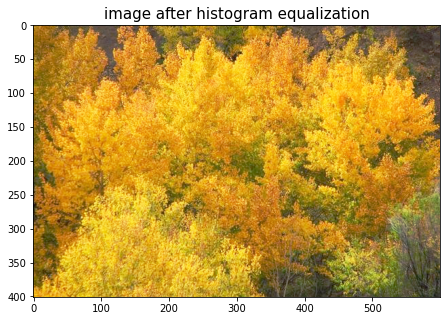

<Figure size 360x360 with 0 Axes>

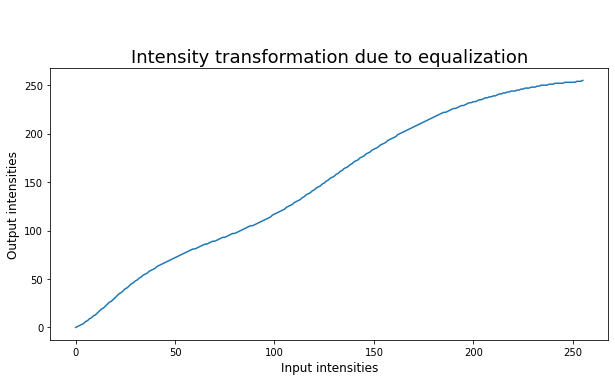

<Figure size 720x720 with 0 Axes>

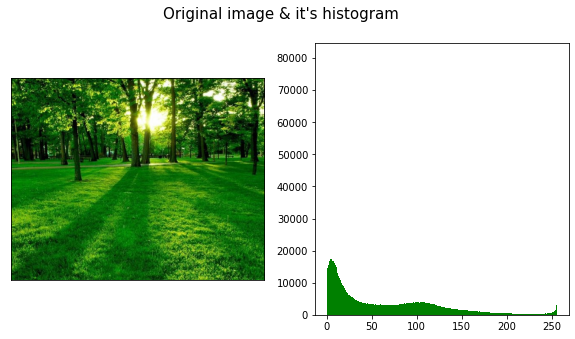

<Figure size 720x360 with 0 Axes>

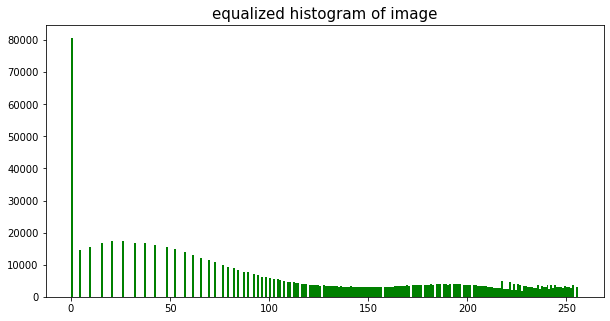

<Figure size 360x360 with 0 Axes>

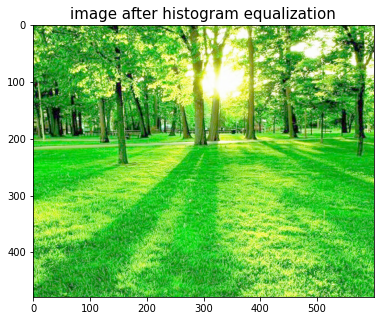

<Figure size 360x360 with 0 Axes>

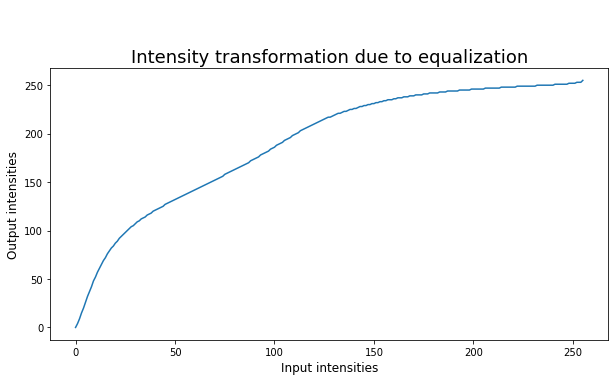

<Figure size 720x720 with 0 Axes>

In [ ]:
l = [HawkesBay, chestxray1, crayons, image1, image2]
for i in l:
  hist_of_img(i,"Original image & it's histogram")
  show_eq_hist(i, 'equalized histogram of image')
  show_eq_hist_img(i, 'image after histogram equalization')
  intensity_hist(hist_equalization(i))
  print('\n')

### a) Compare your results with OpenCV’s cv2.equalizeHist() to see if you get comparable results.

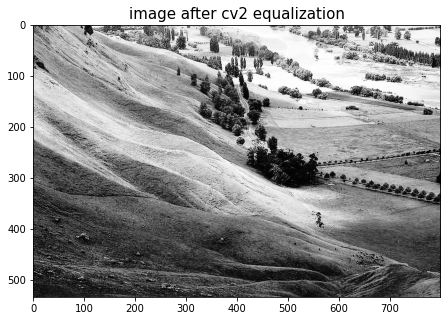

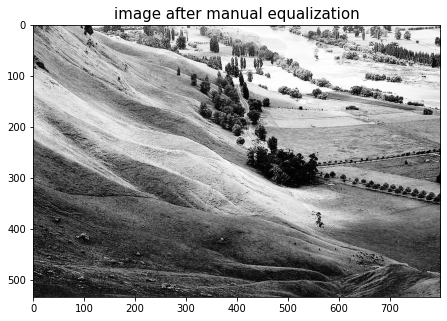

<Figure size 360x360 with 0 Axes>

In [ ]:
eq_image = cv2.equalizeHist(HawkesBay)
plt.imshow(eq_image, cmap = 'gray')
plt.title('image after cv2 equalization', fontsize = 15)
plt.show()
show_eq_hist_img(HawkesBay, 'image after manual equalization')

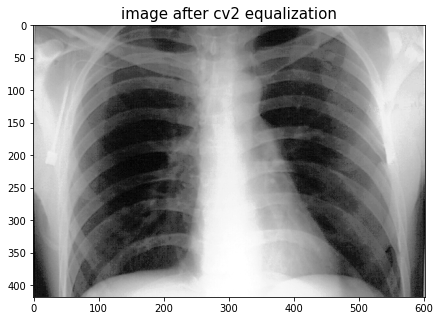

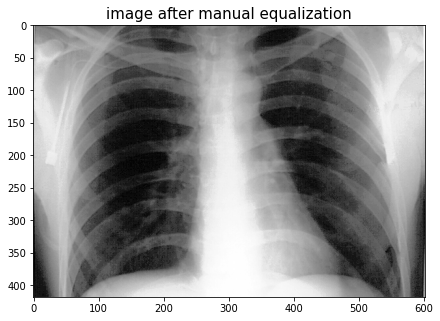

<Figure size 360x360 with 0 Axes>

In [ ]:
eq_image = cv2.equalizeHist(chestxray1)
plt.imshow(eq_image, cmap = 'gray')
plt.title('image after cv2 equalization', fontsize = 15)
plt.show()
show_eq_hist_img(chestxray1, 'image after manual equalization')

### b) Is the intensity distribution of the equalized histogram a uniform distribution? Why or why not?


As we saw in the class, the histogram equalization will occur correctly if the intensity distribution is a continous distribution. Since the distribution is discrete so the equalized histogram is not exactly identical to a uniform distribution. As the distribution gets closer to a continuous distribution, the equalized gistogram will converge to a uniform distribution.

## 3) Download the image ‘image1’ and ‘image2’ from the Google folder

### a) Extract the 3 color channels for each image and plot their respective histograms (so six in all).


In [ ]:
def Hist_3chan(img, title):
  channels = cv2.split(img)
  color = ['r', 'g', 'b']
  fig, ax = plt.subplots(1,3, figsize=(20,8))
  for i in range(3):
    ax[i].hist(channels[i].flatten(), color=color[i])
    ax[i].set_title(f'Channel-{color[i]} Histogram', fontsize=15)
  plt.suptitle(f"Histograms For {title}\n\n", fontsize=20)
  plt.show()

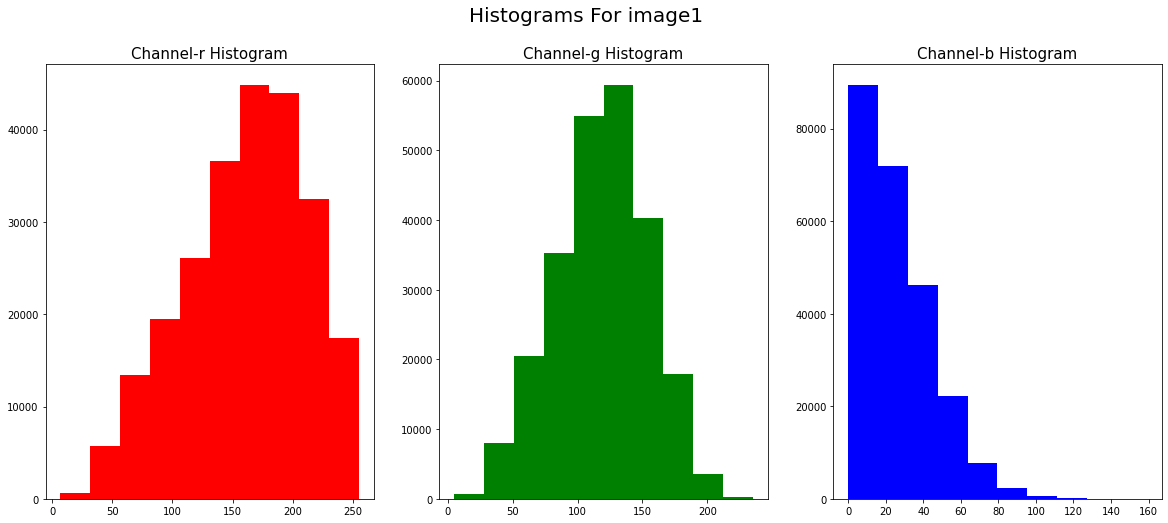

In [ ]:
Hist_3chan(image1, 'image1')

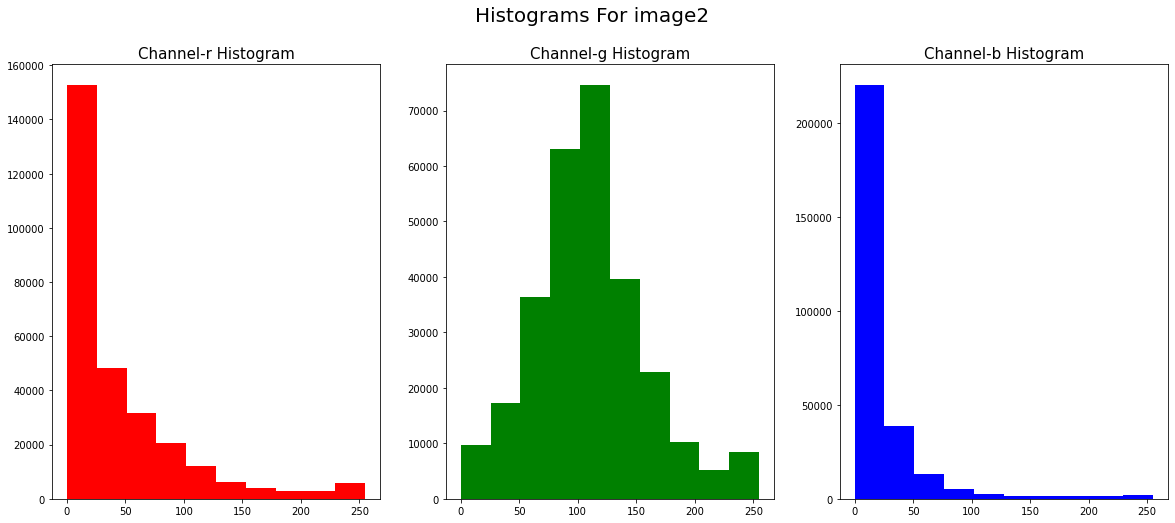

In [ ]:
Hist_3chan(image2, 'image2')

### b) For each channel, match the histograms of each colour channel of image1 with corresponding channel histograms of image2.


In [ ]:
def find_nearest_above(src, tgt):
  diff = src - tgt
  mask = np.ma.less_equal(diff, 0)
  '''
  Masking zero and negative differences
  since we are looking for values above
  '''
  return np.abs(diff).argmin()

In [ ]:
def intensity_matching(src, tgt):
  oldshape = src.shape
  src = src.ravel()
  tgt = tgt.ravel()

  s_values, bin_idx, s_counts = np.unique(src, return_inverse=True, return_counts=True)
  t_values, t_counts = np.unique(tgt, return_counts=True)

  # Calculating s_k values for the original image
  s_quantiles = np.cumsum(s_counts).astype(np.float64)
  s_quantiles /= s_quantiles[-1]

  # Calculating G(z_k) values for the specified image
  t_quantiles = np.cumsum(t_counts).astype(np.float64)
  t_quantiles /= t_quantiles[-1]

  # Rounding the values of arrays
  source = np.around(s_quantiles*255)
  target = np.around(t_quantiles*255)

  # Mapping the rounded values
  b = []
  for data in source:
      b.append(find_nearest_above(target ,data))
  b = np.array(b,dtype='uint8')

  return b[bin_idx].reshape(oldshape)

### c) Reconstruct the new image1 in colour.

In [ ]:
def histogram_matching(img1, img2):

  # Splitting channels from both images
  r_src, g_src, b_src = cv2.split(img1)
  r_tgt, g_tgt, b_tgt = cv2.split(img2)

  # Applying histogram matching to all pairs
  r_new = intensity_matching(r_src,r_tgt)
  g_new = intensity_matching(g_src,g_tgt)
  b_new = intensity_matching(b_src,b_tgt)

  # Merging new channels
  new_img1 = cv2.merge([r_new, g_new, b_new])

  # Plotting images
  fig, ax = plt.subplots(1,3, figsize=(20,10))
  ax[0].imshow(img1)
  ax[0].set_title('image1')
  ax[1].imshow(img2)
  ax[1].set_title('image2')
  ax[2].imshow(new_img1)
  ax[2].set_title('new image1 after histogram matching')
  fig.suptitle('Histogram Matching', fontsize = 20)
  plt.show()

### d) Compare the result with the original images.


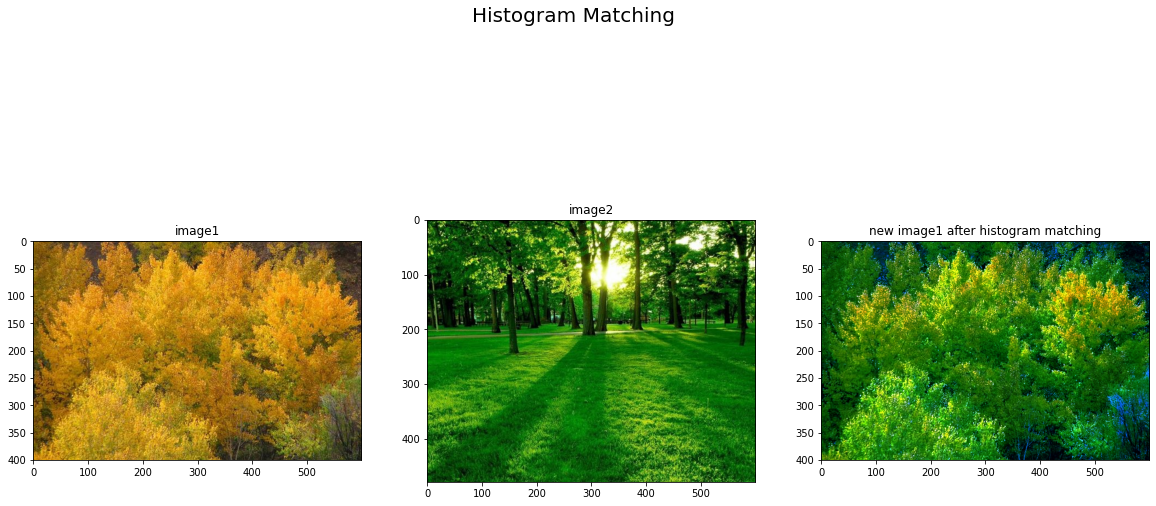

In [ ]:
histogram_matching(image1, image2)

So, we can observe that the image1 was shaded with yellow colour and after histogram matching it becomes dominated by green colour since image2 was shaded with green colour.

## 5) Pick a grayscale image, either from the given ones or from scikit’s image repository. Perform intensity slicing on the image in two ways:
let us consider the camera image from skimage for this exercise.
### a) highlight a particular range and set the rest to zero

In [ ]:
def intensity_slicing_1(img, min_range, max_range):
  row, column = img.shape
  # Creating an array with zeroes to store the sliced image
  img_new = np.zeros((row,column),dtype = 'uint8')

  #performing intensity slicing as asked in part (a)
  temp = [0]*256
  for i in range(row):
    for j in range(column):
      if img[i,j] > min_range and img[i,j] < max_range:
        img_new[i,j] = 255
  for i in range(min_range, max_range + 1):
    temp[i] = 255
  return img_new, temp

### b) highlight a particular range and leave the rest unchanged.


In [ ]:
def intensity_slicing_2(img, min_range, max_range):
  row, column = img.shape
  # Creating an array with zeroes to store the sliced image
  img_new = np.zeros((row,column),dtype = 'uint8')

  #performing intensity slicing as asked in part (b)
  temp = [i for i in range(0,256)]
  for i in range(row):
    for j in range(column):
      if img[i,j] > min_range and img[i,j] < max_range:
        img_new[i,j] = 255
      else:
        img_new[i,j] = img[i,j]
  for i in range(min_range, max_range + 1):
    temp[i] = 255
  return img_new, temp

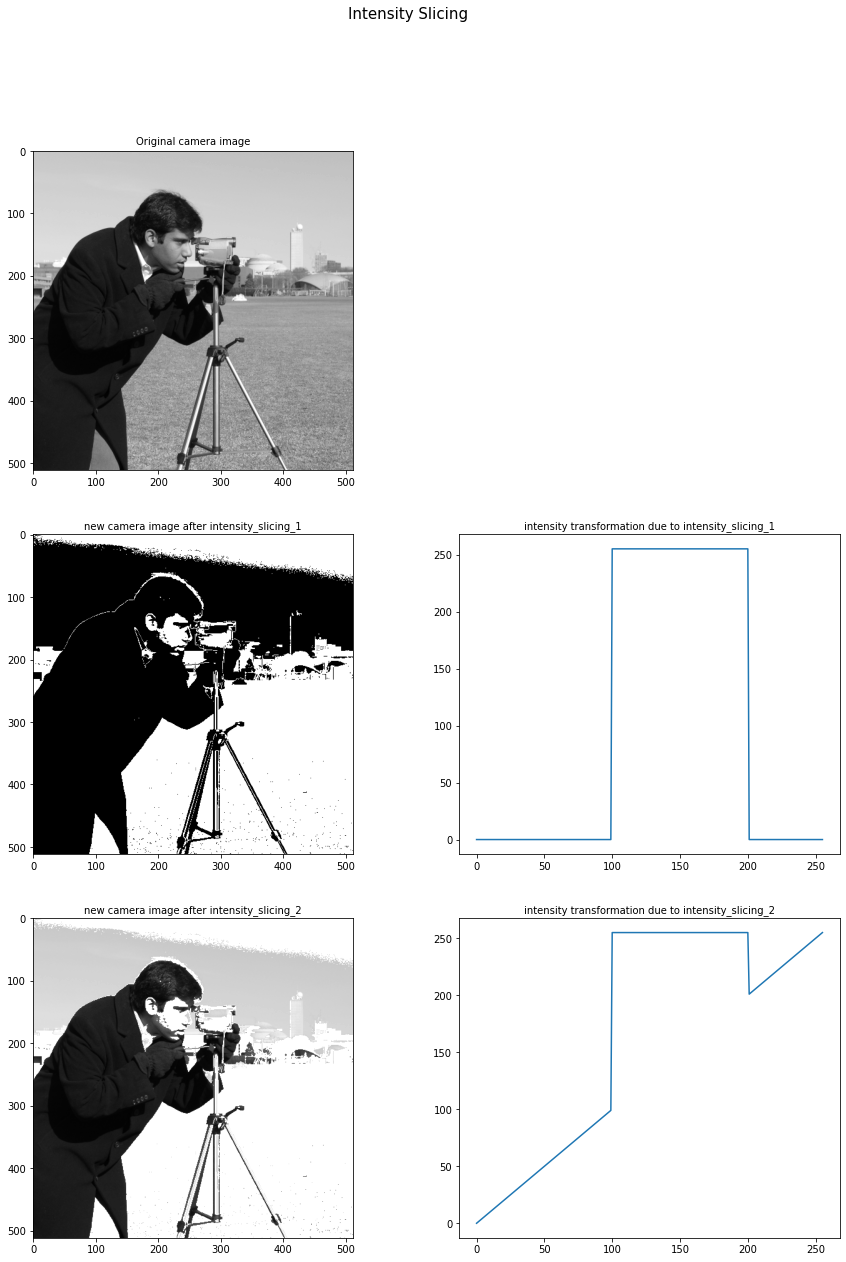

In [ ]:
# Setting the minimum and maximum range
min_range = 100
max_range = 200

from skimage import data

camera = data.camera()
# Plotting images for comparison
fig, ax = plt.subplots(3,2, figsize=(15,20))
fig.delaxes(ax[0,1])
ax[0,0].imshow(camera, cmap = 'gray')
ax[0,0].set_title('Original camera image', fontsize = 10)
ax[1,0].imshow(intensity_slicing_1(camera, min_range, max_range)[0], cmap = 'gray')
ax[1,0].set_title('new camera image after intensity_slicing_1', fontsize = 10)
ax[1,1].plot(list(range(0,256)), intensity_slicing_1(camera, min_range, max_range)[1])
ax[1,1].set_title('intensity transformation due to intensity_slicing_1', fontsize = 10)
ax[2,0].imshow(intensity_slicing_2(camera, min_range, max_range)[0], cmap = 'gray')
ax[2,0].set_title('new camera image after intensity_slicing_2', fontsize = 10)
ax[2,1].plot(list(range(0,256)), intensity_slicing_2(camera, min_range, max_range)[1])
ax[2,1].set_title('intensity transformation due to intensity_slicing_2', fontsize = 10)
fig.suptitle('Intensity Slicing', fontsize = 15)
plt.show()

## 6) Perform bit-plane slicing on the same grayscale image used in Exercise 5.


### a) Display all the bit planes, labeling them as ‘bitplane0’(corresponding to the least significant bit) to ‘bitplane7’(corresponding to the most significant bit).


In [ ]:
l = []
for i in range(camera.shape[0]):
  for j in range(camera.shape[1]):
    l.append(np.binary_repr(camera[i][j], width=8))

images = np.zeros((8, camera.shape[0],camera.shape[1]), np.uint8)

for p in range(8):
    b = 2**p
    images[p] = (np.array([int(i[7-p]) for i in l],dtype = np.uint8)*b).reshape(camera.shape[0],camera.shape[1])

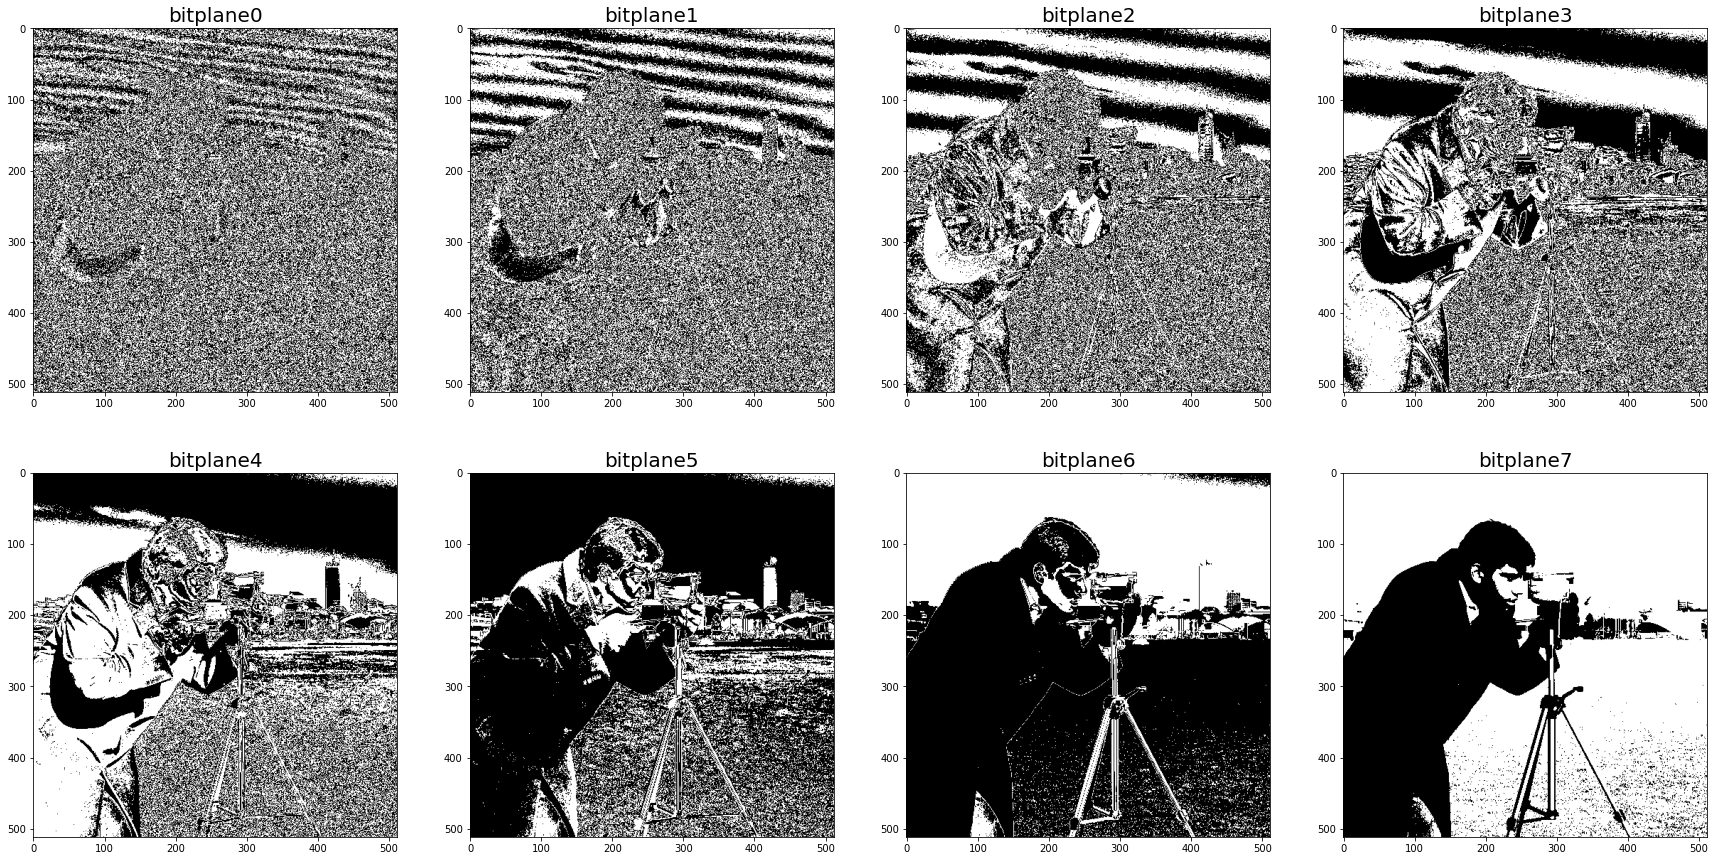

In [ ]:
titles, imgs = [], []
for i in range(8):
  imgs.append(images[i]/np.max(images[i])*255)
  titles.append(f'bitplane{i}')
fig, ax = plt.subplots(2,4, figsize=(30,15))
for i in range(2):
  for j in range(4):
    ax[i,j].imshow(imgs[4*i+j], cmap = 'gray')
    ax[i,j].set_title(titles[4*i+j], fontsize = 20)

### b) Plot the intensity transformation being used to extract bitplane0, bitplane3 and bitplane7.

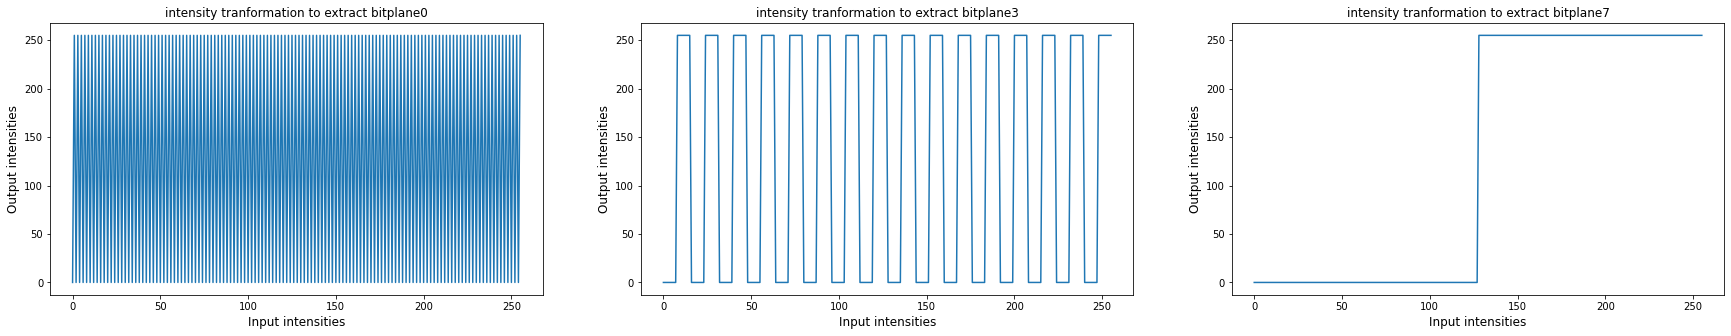

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(30,5))
c = 0
for i in [0,3,7]:
  temp_int = [255]*256
  for j in range(256):
    if int(np.binary_repr(j, width=8)[7-i]) == 0:
      temp_int[j] = 0
  ax[c].plot(list(range(0,256)),temp_int)
  ax[c].set_xlabel("Input intensities", fontsize = 12)
  ax[c].set_ylabel("Output intensities", fontsize = 12)
  ax[c].set_title(f'intensity tranformation to extract bitplane{i}', fontsize = 12)
  c += 1

### c) Try to reconstruct the image with fewer bit planes so as to visually appear as resembling the original. What is the minimum number of bit planes the you can use without degrading the image quality too much?

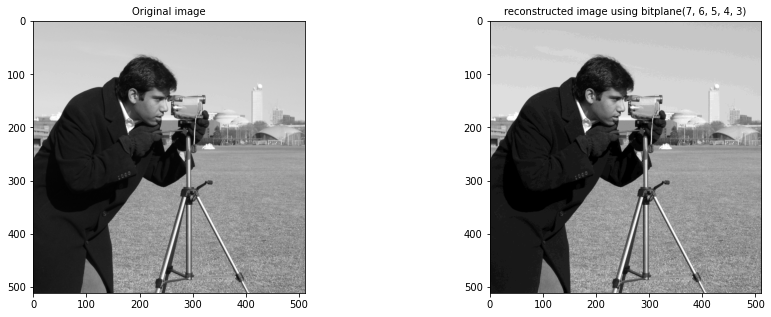

In [ ]:
#reconstructing image with fewer bitplanes
new_img = images[7] + images[6] + images[5] + images[4] + images[3]

#comapring reconstructed image with the original one
fig, ax = plt.subplots(1,2, figsize=(15,5))
ax[0].imshow(camera, cmap = 'gray')
ax[0].set_title('Original image', fontsize = 10)
ax[1].imshow(new_img, cmap = 'gray')
ax[1].set_title(f'reconstructed image using bitplane{7,6,5,4,3}', fontsize = 10)
plt.show()

So, we can observe that if we reconstruct the image by slicing out 3 least significance bits, we can still get a resemble image

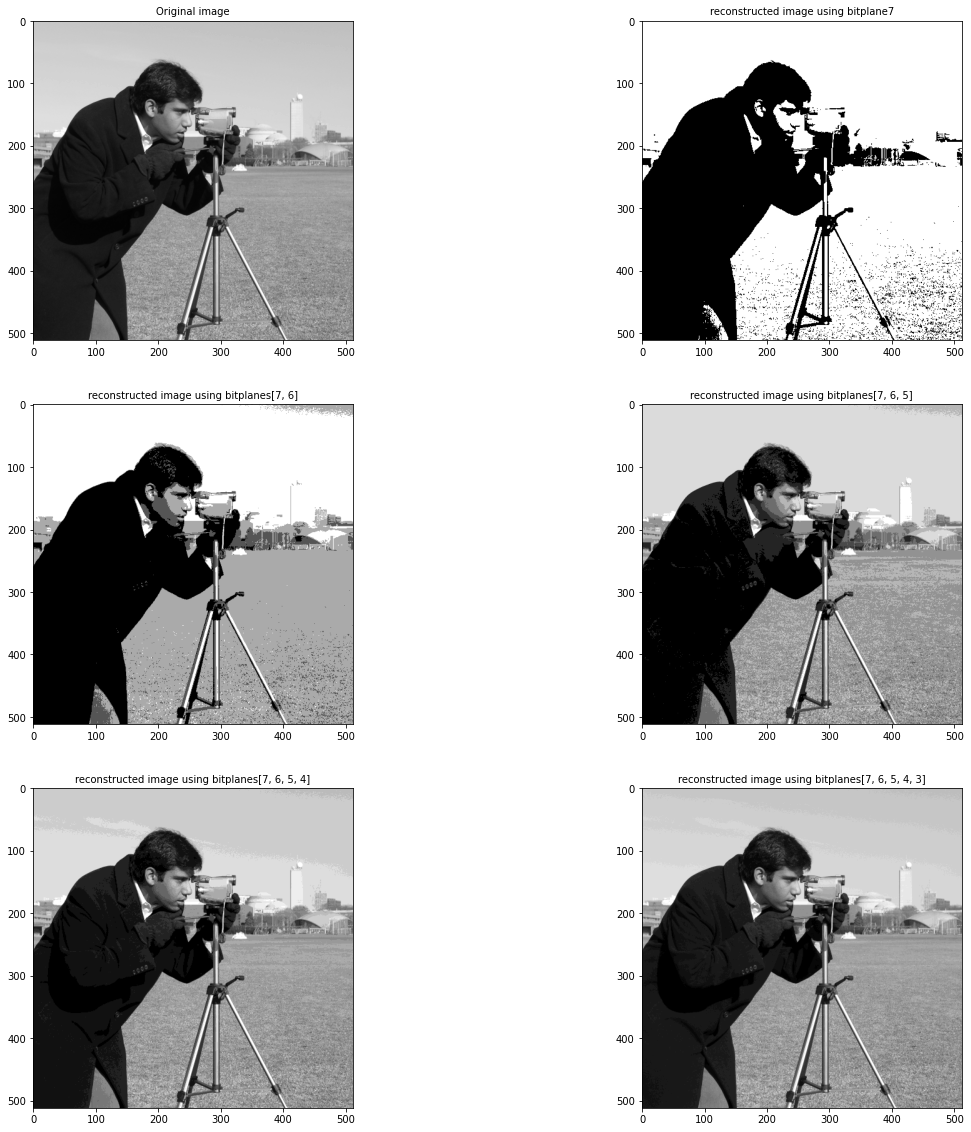

In [ ]:
#reconstructing image with fewer bitplanes
new_img = images[7]

#comapring reconstructed image with the original one
fig, ax = plt.subplots(3,2, figsize=(20,20))
ax[0,0].imshow(camera, cmap = 'gray')
ax[0,0].set_title('Original image', fontsize = 10)
ax[0,1].imshow(new_img, cmap = 'gray')
ax[0,1].set_title(f'reconstructed image using bitplane{7}', fontsize = 10)
c = 1
l = [7]
for i in range(1,3):
  for j in range(0,2):
    new_img += images[7-c]
    l += [7-c]
    c += 1
    ax[i,j].imshow(new_img, cmap = 'gray')
    ax[i,j].set_title(f'reconstructed image using bitplanes{l}', fontsize = 10)
plt.show()

Hence, we can conclude that if we should use atleast 4 most significant bitplanes to reconstruct the image so that we don't loose too much information.